# Test AnalizadorImagenes
## Prueba de la clase optimizada para análisis de imágenes de papas

Este notebook demuestra el uso de la clase `AnalizadorImagenes` para realizar análisis exploratorio de datos de imágenes.

### 1. Importaciones y configuración inicial

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importar nuestra clase optimizada
from src.DataPrepEdaCnn import DataPrepEdaCnn as AnalizadorImagenes
from src.utils.metrics import obtener_ruta_app

# Configurar matplotlib para mostrar gráficos inline
%matplotlib inline

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


### 2. Inicializar el analizador

In [2]:
# Configurar la ruta del proyecto
directorio_proyecto = obtener_ruta_app("AgroIA")

# Crear instancia del analizador
analizador = AnalizadorImagenes(directorio_proyecto)

print(f"✅ Analizador inicializado con directorio: {directorio_proyecto}")

✅ Analizador inicializado con directorio: C:\Users\pmari\OneDrive\Para Revisar\Documentos\GitKraken\AgroIAPrincipal\AgroIA


### 3. Configurar rutas y explorar estructura del proyecto

In [3]:
# Configurar rutas de train y test
analizador.configurar_rutas()

print("📁 Contenido del directorio principal:")
contenido_principal = analizador.listar_contenido()
for item in contenido_principal:
    print(f"  - {item}")

📁 Contenido del directorio principal:
  - .git
  - .idea
  - .venv
  - api
  - app
  - data
  - main.py
  - models
  - notebooks
  - README.md
  - src


In [4]:
# Obtener y mostrar las clases disponibles
print("🏷️ Clases disponibles en el dataset entranimento:")
clases = analizador.obtener_clases_disponibles_entrenamiento()
for i, clase in enumerate(clases, 1):
    print(f"  {i}. {clase}")

🏷️ Clases disponibles en el dataset entranimento:
  1. Potato_Early_blight
  2. Potato_healthy
  3. Potato_Late_blight


In [5]:
# Obtener y mostrar las clases disponibles
print("🏷️ Clases disponibles en el dataset pruebas:")
clases = analizador.obtener_clases_disponibles_pruebas()
for i, clase in enumerate(clases, 1):
    print(f"  {i}. {clase}")

🏷️ Clases disponibles en el dataset pruebas:
  1. Potato_Early_blight
  2. Potato_healthy
  3. Potato_Late_blight


### 4. Análisis cuantitativo del dataset

In [6]:
# Contar imágenes por clase
conteos = analizador.contar_imagenes_por_clase("entrenamiento")

print("📊 Distribución de imágenes entrenamiento por clase:")
total_imagenes = 0
for clase, cantidad in conteos.items():
    print(f"  {clase}: {cantidad:,} imágenes")
    total_imagenes += cantidad

print(f"\n📈 Total de imágenes: {total_imagenes:,}")

📊 Distribución de imágenes entrenamiento por clase:
  Potato_Early_blight: 800 imágenes
  Potato_healthy: 100 imágenes
  Potato_Late_blight: 800 imágenes

📈 Total de imágenes: 1,700


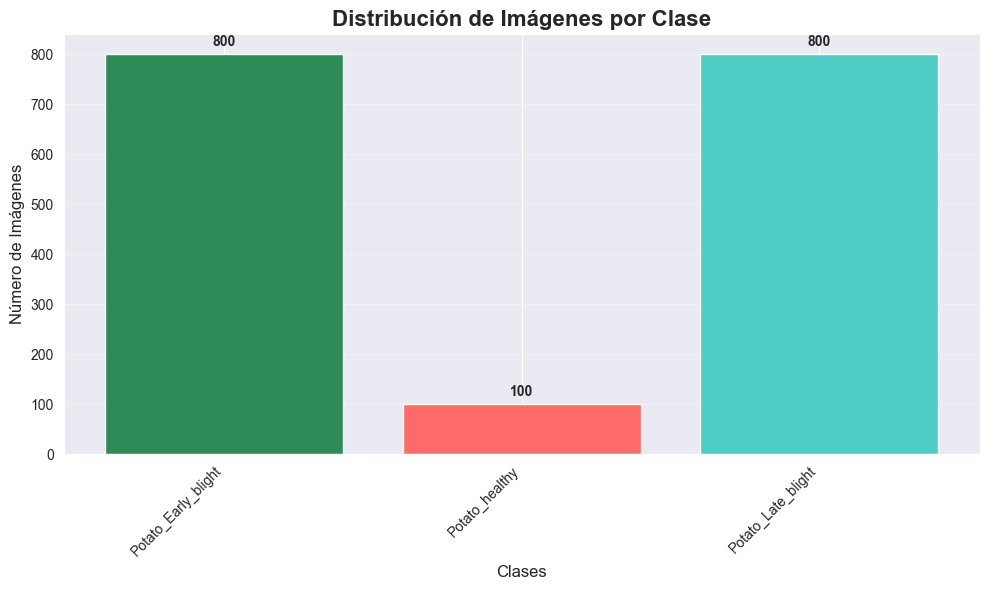

In [7]:
# Crear gráfico de barras para visualizar la distribución
plt.figure(figsize=(10, 6))
clases_nombres = list(conteos.keys())
cantidades = list(conteos.values())

bars = plt.bar(clases_nombres, cantidades, color=['#2E8B57', '#FF6B6B', '#4ECDC4'])
plt.title('Distribución de Imágenes por Clase', fontsize=16, fontweight='bold')
plt.xlabel('Clases', fontsize=12)
plt.ylabel('Número de Imágenes', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Agregar valores en las barras
for bar, cantidad in zip(bars, cantidades):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10,
             f'{cantidad:,}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.show()

In [8]:
# Contar imágenes por clase
conteos = analizador.contar_imagenes_por_clase("pruebas")

print("📊 Distribución de imágenes pruebas por clase:")
total_imagenes = 0
for clase, cantidad in conteos.items():
    print(f"  {clase}: {cantidad:,} imágenes")
    total_imagenes += cantidad

print(f"\n📈 Total de imágenes: {total_imagenes:,}")

📊 Distribución de imágenes pruebas por clase:
  Potato_Early_blight: 200 imágenes
  Potato_healthy: 52 imágenes
  Potato_Late_blight: 200 imágenes

📈 Total de imágenes: 452


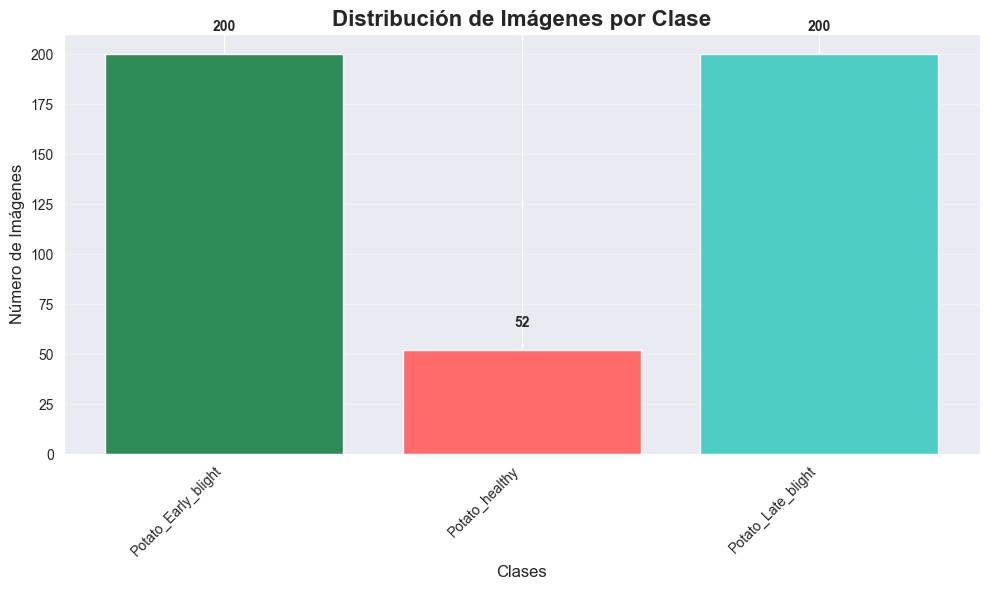

In [9]:
# Crear gráfico de barras para visualizar la distribución
plt.figure(figsize=(10, 6))
clases_nombres = list(conteos.keys())
cantidades = list(conteos.values())

bars = plt.bar(clases_nombres, cantidades, color=['#2E8B57', '#FF6B6B', '#4ECDC4'])
plt.title('Distribución de Imágenes por Clase', fontsize=16, fontweight='bold')
plt.xlabel('Clases', fontsize=12)
plt.ylabel('Número de Imágenes', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Agregar valores en las barras
for bar, cantidad in zip(bars, cantidades):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10,
             f'{cantidad:,}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.show()

### 5. Análisis de dimensiones de las imágenes

In [10]:
# Analizar dimensiones por clase
estadisticas_dim = analizador.analizar_dimensiones_por_clase("entrenamiento")

print("📏 Estadísticas de dimensiones por clase para entrenamiento:\n")
for clase, stats in estadisticas_dim.items():
    print(f"🔍 {clase.upper()}:")
    print(f"  • Altura promedio: {stats['altura_promedio']:.1f} px")
    print(f"  • Ancho promedio: {stats['ancho_promedio']:.1f} px")
    print(f"  • Rango altura: {stats['altura_min']} - {stats['altura_max']} px")
    print(f"  • Rango ancho: {stats['ancho_min']} - {stats['ancho_max']} px")
    print(f"  • Total imágenes analizadas: {stats['total_imagenes']}")
    print()

📏 Estadísticas de dimensiones por clase para entrenamiento:

🔍 POTATO_EARLY_BLIGHT:
  • Altura promedio: 256.0 px
  • Ancho promedio: 256.0 px
  • Rango altura: 256 - 256 px
  • Rango ancho: 256 - 256 px
  • Total imágenes analizadas: 800

🔍 POTATO_HEALTHY:
  • Altura promedio: 256.0 px
  • Ancho promedio: 256.0 px
  • Rango altura: 256 - 256 px
  • Rango ancho: 256 - 256 px
  • Total imágenes analizadas: 100

🔍 POTATO_LATE_BLIGHT:
  • Altura promedio: 256.0 px
  • Ancho promedio: 256.0 px
  • Rango altura: 256 - 256 px
  • Rango ancho: 256 - 256 px
  • Total imágenes analizadas: 800



In [11]:
# Analizar dimensiones por clase
estadisticas_dim = analizador.analizar_dimensiones_por_clase("pruebas")

print("📏 Estadísticas de dimensiones por clase para pruebas:\n")
for clase, stats in estadisticas_dim.items():
    print(f"🔍 {clase.upper()}:")
    print(f"  • Altura promedio: {stats['altura_promedio']:.1f} px")
    print(f"  • Ancho promedio: {stats['ancho_promedio']:.1f} px")
    print(f"  • Rango altura: {stats['altura_min']} - {stats['altura_max']} px")
    print(f"  • Rango ancho: {stats['ancho_min']} - {stats['ancho_max']} px")
    print(f"  • Total imágenes analizadas: {stats['total_imagenes']}")
    print()

📏 Estadísticas de dimensiones por clase para pruebas:

🔍 POTATO_EARLY_BLIGHT:
  • Altura promedio: 256.0 px
  • Ancho promedio: 256.0 px
  • Rango altura: 256 - 256 px
  • Rango ancho: 256 - 256 px
  • Total imágenes analizadas: 200

🔍 POTATO_HEALTHY:
  • Altura promedio: 256.0 px
  • Ancho promedio: 256.0 px
  • Rango altura: 256 - 256 px
  • Rango ancho: 256 - 256 px
  • Total imágenes analizadas: 52

🔍 POTATO_LATE_BLIGHT:
  • Altura promedio: 256.0 px
  • Ancho promedio: 256.0 px
  • Rango altura: 256 - 256 px
  • Rango ancho: 256 - 256 px
  • Total imágenes analizadas: 200



### 6. Generar reporte completo del dataset

In [12]:
# Generar reporte completo en formato DataFrame
reporte_df = analizador.generar_reporte_dataset("entrenamiento")

print("📋 Reporte completo del dataset entrenamiento:")
print(reporte_df.to_string(index=False))

📋 Reporte completo del dataset entrenamiento:
              Clase  Num_Imagenes  Altura_Promedio  Ancho_Promedio  Altura_Min  Altura_Max  Ancho_Min  Ancho_Max
Potato_Early_blight           800            256.0           256.0         256         256        256        256
     Potato_healthy           100            256.0           256.0         256         256        256        256
 Potato_Late_blight           800            256.0           256.0         256         256        256        256


In [13]:
# Mostrar estadísticas resumidas
print("📊 Resumen estadístico:")
print(f"  • Altura promedio general: {reporte_df['Altura_Promedio'].mean():.1f} px")
print(f"  • Ancho promedio general: {reporte_df['Ancho_Promedio'].mean():.1f} px")
print(f"  • Total de clases: {len(reporte_df)}")
print(f"  • Total de imágenes: {reporte_df['Num_Imagenes'].sum():,}")

📊 Resumen estadístico:
  • Altura promedio general: 256.0 px
  • Ancho promedio general: 256.0 px
  • Total de clases: 3
  • Total de imágenes: 1,700


In [14]:
# Generar reporte completo en formato DataFrame
reporte_df = analizador.generar_reporte_dataset("entrenamiento")

print("📋 Reporte completo del dataset entrenamiento:")
print(reporte_df.to_string(index=False))

📋 Reporte completo del dataset entrenamiento:
              Clase  Num_Imagenes  Altura_Promedio  Ancho_Promedio  Altura_Min  Altura_Max  Ancho_Min  Ancho_Max
Potato_Early_blight           800            256.0           256.0         256         256        256        256
     Potato_healthy           100            256.0           256.0         256         256        256        256
 Potato_Late_blight           800            256.0           256.0         256         256        256        256


In [15]:
# Mostrar estadísticas resumidas
print("📊 Resumen estadístico:")
print(f"  • Altura promedio general: {reporte_df['Altura_Promedio'].mean():.1f} px")
print(f"  • Ancho promedio general: {reporte_df['Ancho_Promedio'].mean():.1f} px")
print(f"  • Total de clases: {len(reporte_df)}")
print(f"  • Total de imágenes: {reporte_df['Num_Imagenes'].sum():,}")

📊 Resumen estadístico:
  • Altura promedio general: 256.0 px
  • Ancho promedio general: 256.0 px
  • Total de clases: 3
  • Total de imágenes: 1,700


### 7. Visualización de distribuciones de dimensiones

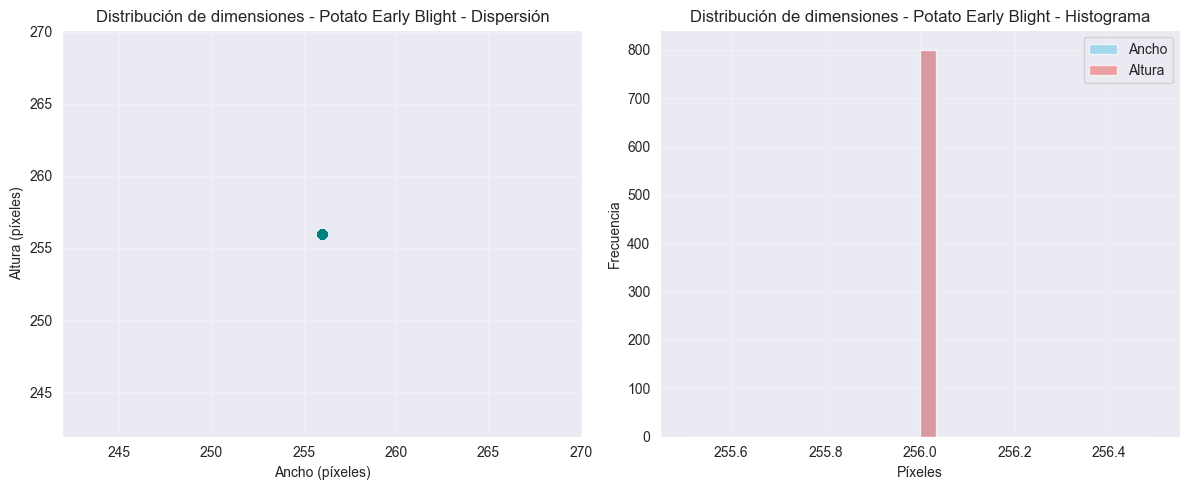

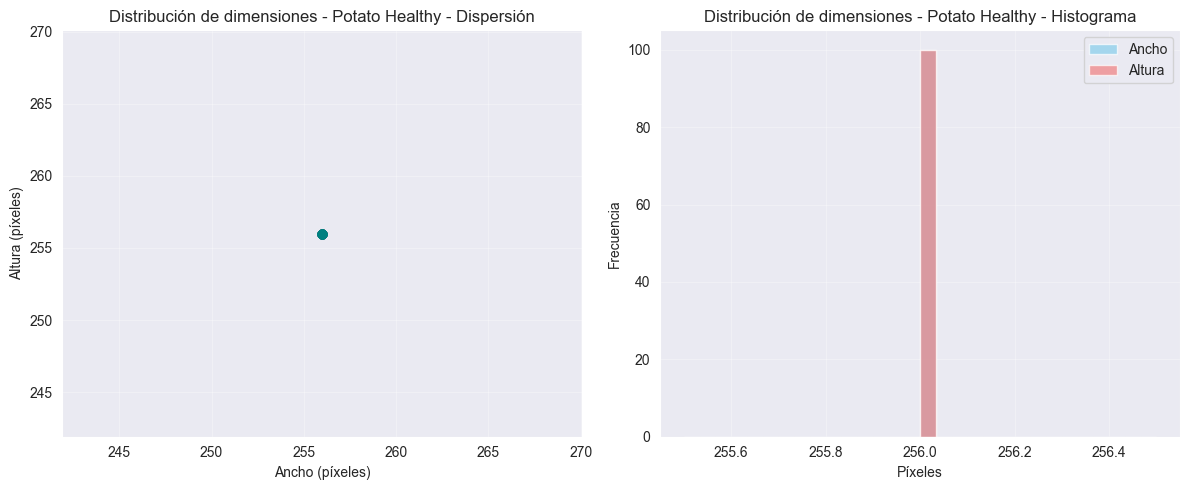

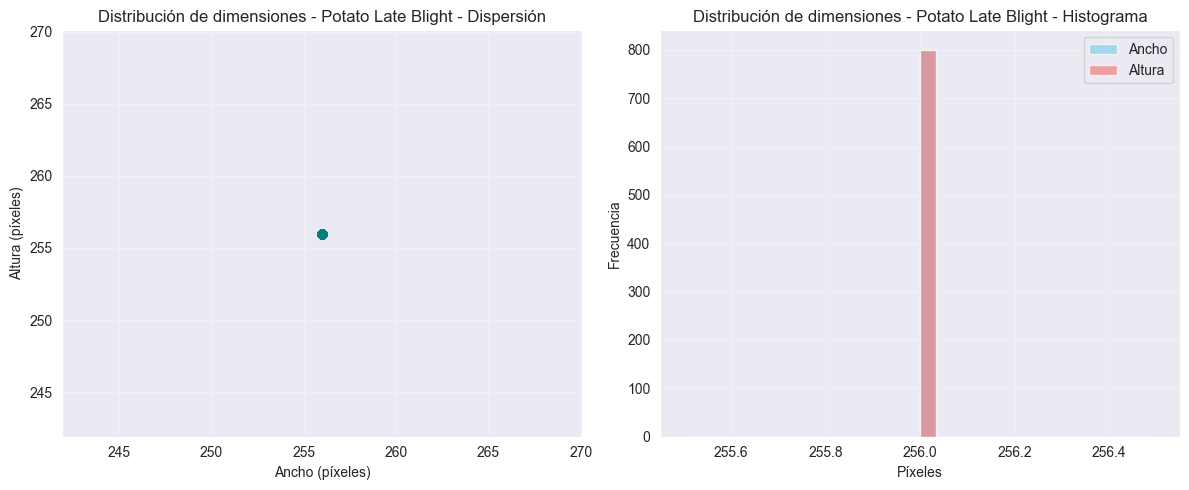

In [16]:
# Graficar distribuciones de dimensiones para cada clase
for clase in clases:
    ruta_clase = os.path.join(analizador.ruta_train, clase)
    titulo = f"Distribución de dimensiones - {clase.replace('_', ' ').title()}"
    analizador.graficar_dimensiones(ruta_clase, titulo)

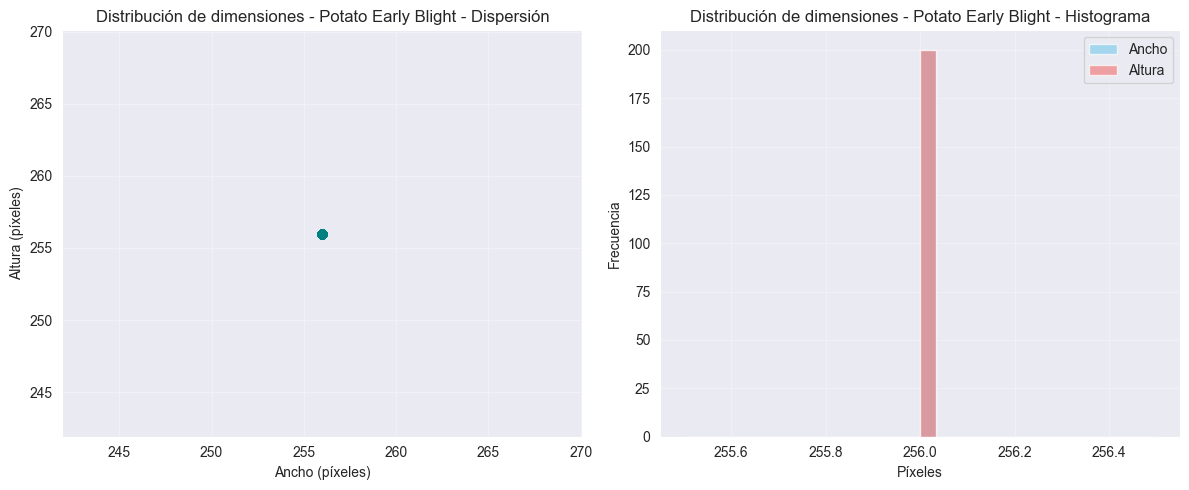

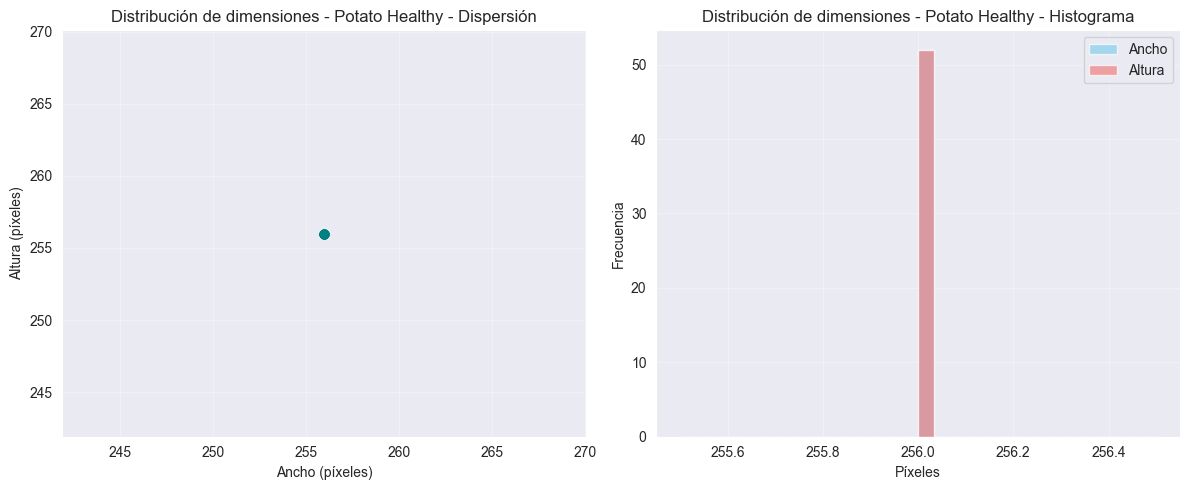

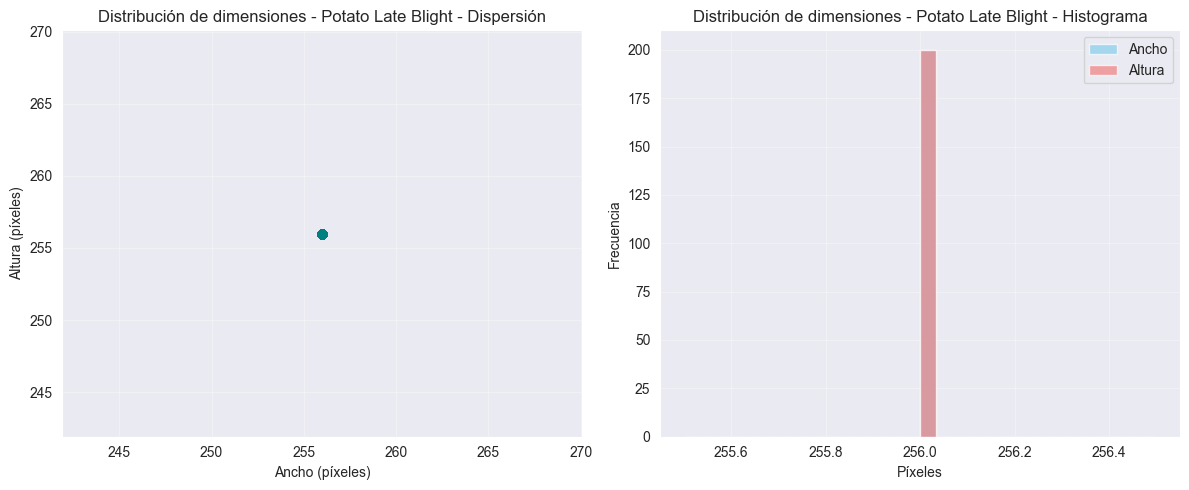

In [17]:
# Graficar distribuciones de dimensiones para cada clase
for clase in clases:
    ruta_clase = os.path.join(analizador.ruta_test, clase)
    titulo = f"Distribución de dimensiones - {clase.replace('_', ' ').title()}"
    analizador.graficar_dimensiones(ruta_clase, titulo)

### 8. Mostrar imágenes de muestra

🖼️ Imágenes de muestra por clase para entrenamiento:


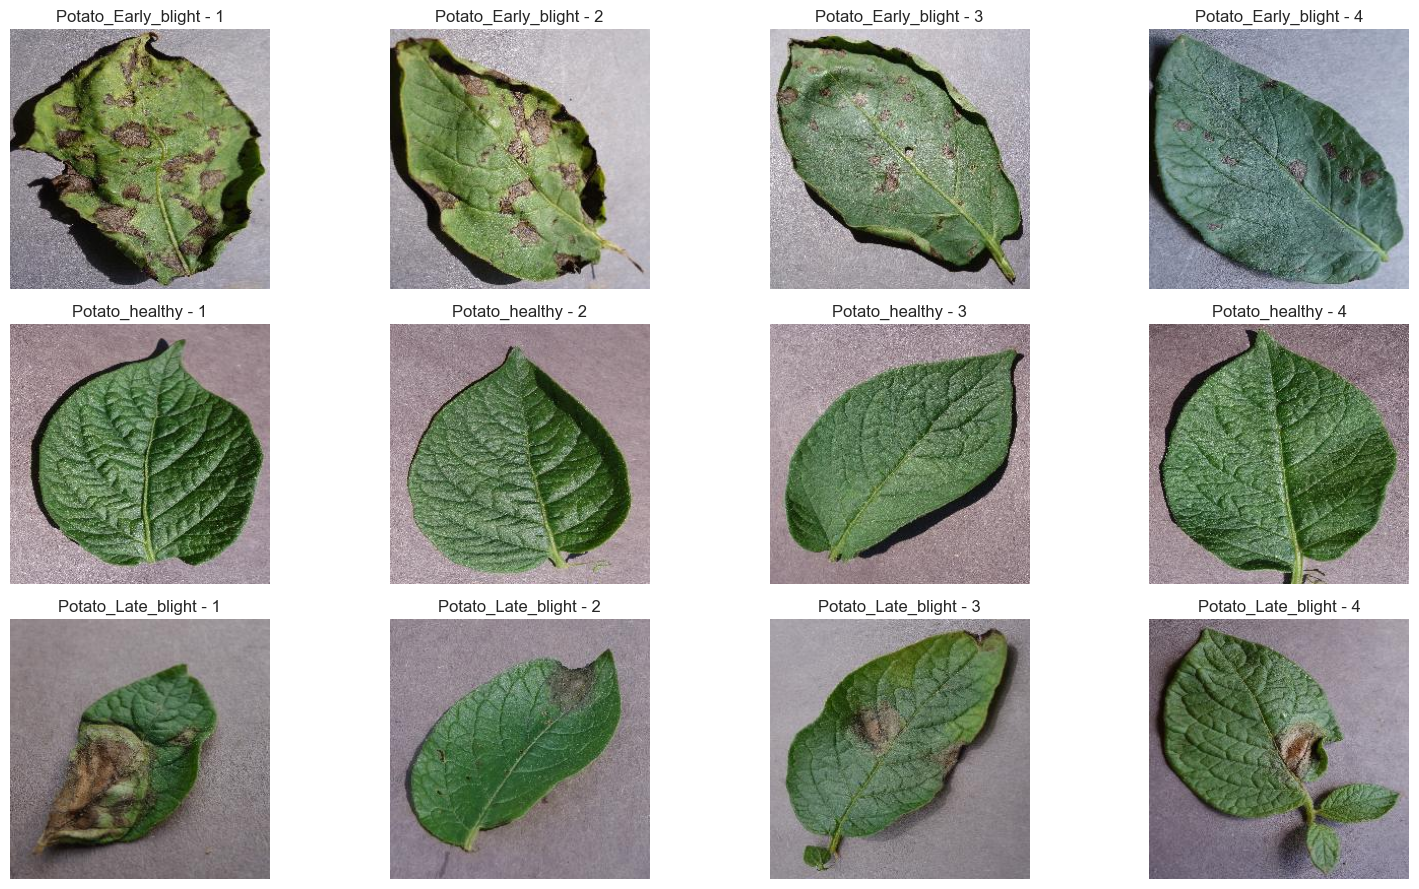

In [18]:
# Mostrar 4 imágenes de muestra de cada clase
print("🖼️ Imágenes de muestra por clase para entrenamiento:")
analizador.mostrar_imagenes_muestra(num_imagenes=4,tipo_movimiento="entrenamiento")

🖼️ Imágenes de muestra por clase para pruebas:


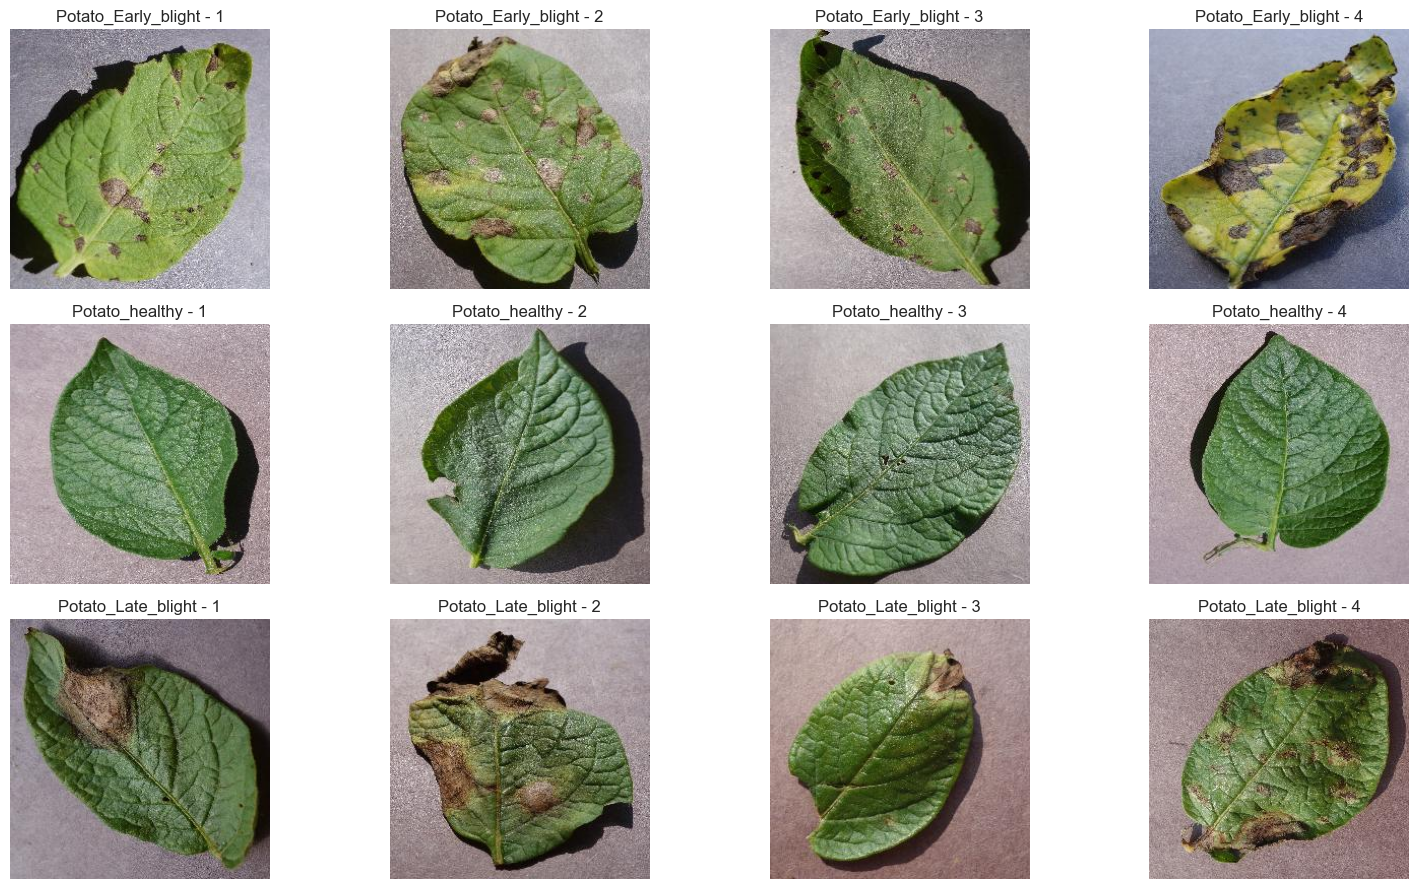

In [19]:
# Mostrar 4 imágenes de muestra de cada clase
print("🖼️ Imágenes de muestra por clase para pruebas:")
analizador.mostrar_imagenes_muestra(4, "pruebas")

### 9. Configuración del procesamiento de imágenes

In [20]:
# Configurar forma de imagen basada en el análisis
altura_objetivo = 256
ancho_objetivo = 256
analizador.configurar_forma_imagen(altura_objetivo, ancho_objetivo, 3)

print(f"✅ Forma de imagen configurada: {analizador.forma_imagen}")

# Configurar tamaño de lote
analizador.configurar_tamano_lote(16)
print(f"✅ Tamaño de lote configurado: {analizador.tamano_lote}")

✅ Forma de imagen configurada: (256, 256, 3)
✅ Tamaño de lote configurado: 16


### 10. Configurar generador de imágenes con aumento de datos

In [21]:
# Configurar el generador con parámetros de aumento de datos
analizador.configurar_generador_imagenes(
    rotacion_max=20,
    desplazamiento_ancho=0.10,
    desplazamiento_alto=0.10,
    distorsion=0.1,
    zoom_max=0.1,
    giro_horizontal=True
)

print("✅ Generador de imágenes configurado con aumento de datos")

✅ Generador de imágenes configurado con aumento de datos


### 11. Crear generadores de datos para entrenamiento

In [22]:
# Crear generadores de datos
analizador.crear_generadores_datos(modo_clase='categorical')

print("✅ Generadores de datos creados")

# Mostrar información de los generadores
print(f"\n📊 Información del generador de entrenamiento:")
print(f"  • Número de muestras: {analizador.generador_train.samples}")
print(f"  • Número de clases: {analizador.generador_train.num_classes}")
print(f"  • Tamaño de lote: {analizador.generador_train.batch_size}")

print(f"\n📊 Información del generador de prueba:")
print(f"  • Número de muestras: {analizador.generador_test.samples}")
print(f"  • Número de clases: {analizador.generador_test.num_classes}")
print(f"  • Tamaño de lote: {analizador.generador_test.batch_size}")

Found 1700 images belonging to 3 classes.
Found 452 images belonging to 3 classes.
✅ Generadores de datos creados

📊 Información del generador de entrenamiento:
  • Número de muestras: 1700
  • Número de clases: 3
  • Tamaño de lote: 16

📊 Información del generador de prueba:
  • Número de muestras: 452
  • Número de clases: 3
  • Tamaño de lote: 16


### 12. Mostrar índices de clases

In [23]:
# Obtener y mostrar índices de clases
indices_clases = analizador.obtener_indices_clases("entrenamiento")

print("🏷️ Índices de clases para el modelo entrenamiento:")
for clase, indice in indices_clases.items():
    print(f"  {clase}: {indice}")

🏷️ Índices de clases para el modelo entrenamiento:
  Potato_Early_blight: 0
  Potato_Late_blight: 1
  Potato_healthy: 2


In [24]:
# Obtener y mostrar índices de clases
indices_clases = analizador.obtener_indices_clases("pruebas")

print("🏷️ Índices de clases para el modelo pruebas:")
for clase, indice in indices_clases.items():
    print(f"  {clase}: {indice}")

🏷️ Índices de clases para el modelo pruebas:
  Potato_Early_blight: 0
  Potato_Late_blight: 1
  Potato_healthy: 2


### 13. Demostrar transformaciones de aumento de datos

🔄 Ejemplos de transformaciones aplicadas a: Potato_Early_blight


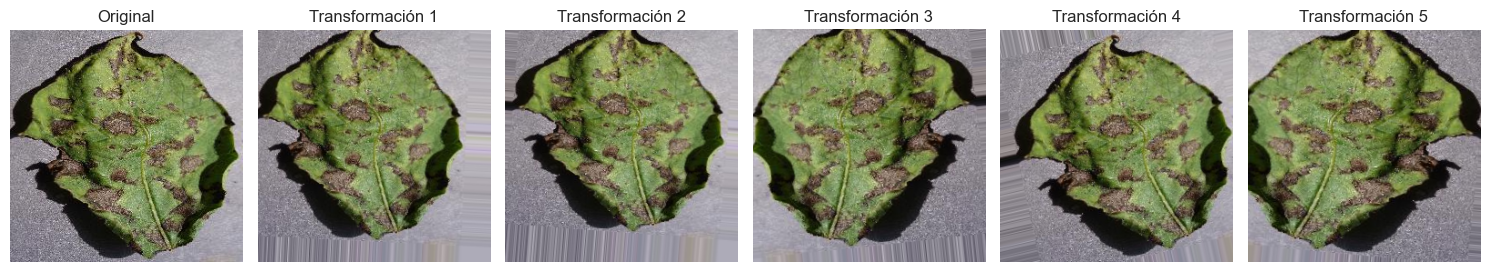

In [25]:
# Mostrar ejemplos de transformaciones en una imagen
# Seleccionar una imagen de ejemplo
clase_ejemplo = clases[0]  # Primera clase disponible
ruta_clase_ejemplo = os.path.join(analizador.ruta_train, clase_ejemplo)
imagenes_ejemplo = os.listdir(ruta_clase_ejemplo)
imagen_ejemplo = os.path.join(ruta_clase_ejemplo, imagenes_ejemplo[0])

print(f"🔄 Ejemplos de transformaciones aplicadas a: {clase_ejemplo}")
analizador.mostrar_transformacion_ejemplo(imagen_ejemplo, num_transformaciones=5)

### 14. Resumen final del análisis

In [26]:
print("=" * 60)
print("           RESUMEN FINAL DEL ANÁLISIS")
print("=" * 60)

print(f"\n🎯 Dataset analizado: Clasificación de enfermedades en papas")
print(f"📁 Directorio: {analizador.directorio_base}")
print(f"\n📊 Estadísticas generales:")
print(f"  • Clases identificadas: {len(clases)}")
print(f"  • Total de imágenes de entrenamiento: {analizador.generador_train.samples:,}")
print(f"  • Total de imágenes de prueba: {analizador.generador_test.samples:,}")
print(f"  • Forma de imagen configurada: {analizador.forma_imagen}")
print(f"  • Tamaño de lote: {analizador.tamano_lote}")

print(f"\n🏷️ Clases del dataset:")
for i, (clase, indice) in enumerate(indices_clases.items(), 1):
    cantidad = conteos[clase]
    print(f"  {i}. {clase} (índice: {indice}) - {cantidad:,} imágenes")

print(f"\n✅ Análisis completado exitosamente")
print(f"✅ Generadores de datos listos para entrenamiento")
print(f"✅ Dataset preparado para modelo de deep learning")
print("=" * 60)

           RESUMEN FINAL DEL ANÁLISIS

🎯 Dataset analizado: Clasificación de enfermedades en papas
📁 Directorio: C:\Users\pmari\OneDrive\Para Revisar\Documentos\GitKraken\AgroIAPrincipal\AgroIA

📊 Estadísticas generales:
  • Clases identificadas: 3
  • Total de imágenes de entrenamiento: 1,700
  • Total de imágenes de prueba: 452
  • Forma de imagen configurada: (256, 256, 3)
  • Tamaño de lote: 16

🏷️ Clases del dataset:
  1. Potato_Early_blight (índice: 0) - 200 imágenes
  2. Potato_Late_blight (índice: 1) - 200 imágenes
  3. Potato_healthy (índice: 2) - 52 imágenes

✅ Análisis completado exitosamente
✅ Generadores de datos listos para entrenamiento
✅ Dataset preparado para modelo de deep learning
